# Late Fusion
## Modality 2: Household food and health expenses

## Setup

In [1]:
import os
from glob import glob
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import pickle
import copy

### Paths

In [2]:
input_path = '../../../2_data_preprocessing/output/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../../config/'

### Load global variables

In [3]:
exec(open(os.path.join(glob_conf_path, 'global_config_paper.py')).read())
exec(open(os.path.join(glob_conf_path, 'config_feature_contributions.py')).read())

## Model interpretation

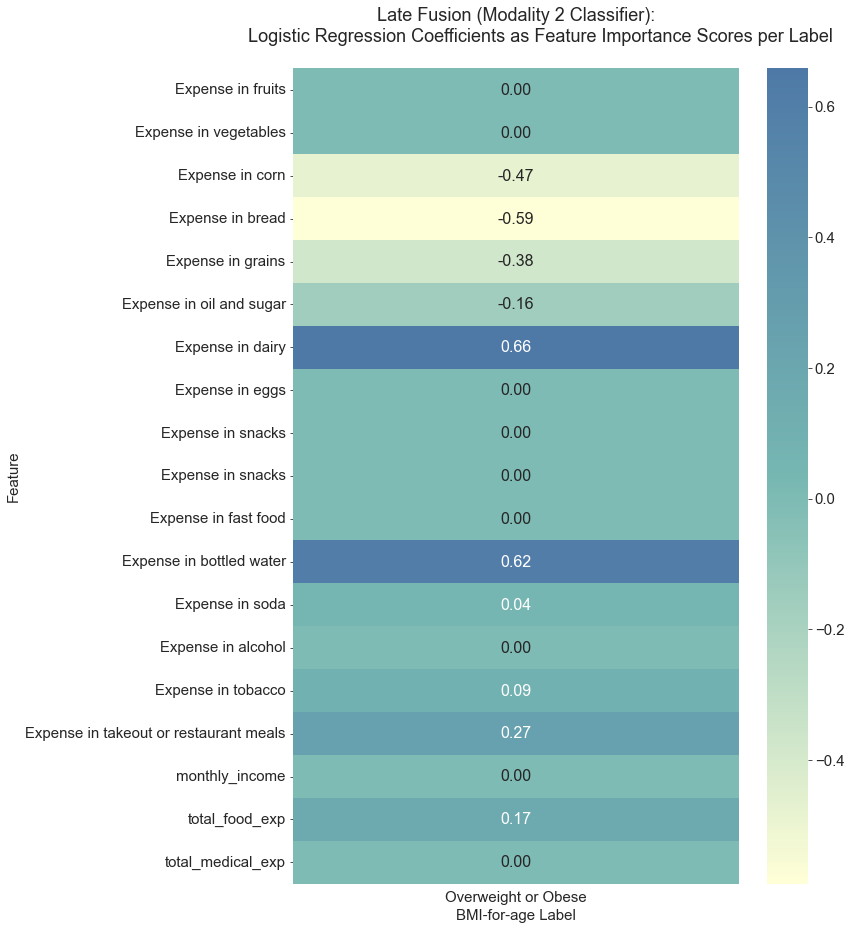

In [4]:
# Load data
train_m2_df = pd.read_csv(os.path.join(input_path, 'train_m2_norm_df.csv'))
feat = list(train_m2_df.drop(columns=['label','group']).columns)


# Load the model from disk
file_path = os.path.join(output_path,'models','mod_elastic_net_m2.sav')
clf = pickle.load(open(file_path, 'rb'))
coef_df = pd.DataFrame(clf.coef_, index=list(label_id_to_label_num_coef_int.keys()), columns=feat).T
#coef_df = coef_df.reindex(sorted(coef_df.columns), axis=1)
coef_df = coef_df.rename(var_name_to_feat_m2, axis=0)
#coef_df = coef_df.reindex(list(var_name_to_feat_m2.values())).dropna()
coef_df.to_csv(os.path.join(output_path,'others','tmp','m2_classifier_feature_contributions.csv'), index=True, header=True)


# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(10,15))
sns.heatmap(coef_df, annot=True, annot_kws={"size": 16}, fmt='.2f', cmap=conf_cmap)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
plt.savefig(os.path.join(output_path,'others','report_m2_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 2 Classifier):
          Logistic Regression Coefficients as Feature Importance Scores per Label
          """)
plt.savefig(os.path.join(output_path,'others','m2_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})

In [5]:
coef_df.sort_values(by="Overweight or Obese", axis=0, ascending=False)

,Overweight or Obese
Expense in dairy,0.658350
Expense in bottled water,0.617154
Expense in takeout or restaurant meals,0.266999
total_food_exp,0.169393
Expense in tobacco,0.093273
Expense in soda,0.039772
Expense in fruits,0.000000
Expense in fast food,0.000000
monthly_income,0.000000
Expense in alcohol,0.000000


In [6]:
clf.coef_

array([[ 0.        ,  0.        , -0.47264937, -0.58959611, -0.37744227,
        -0.15892934,  0.65834956,  0.        ,  0.        ,  0.        ,
         0.        ,  0.61715367,  0.03977157,  0.        ,  0.09327328,
         0.26699946,  0.        ,  0.16939338,  0.        ]])

c:\Users\rosar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\rosar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


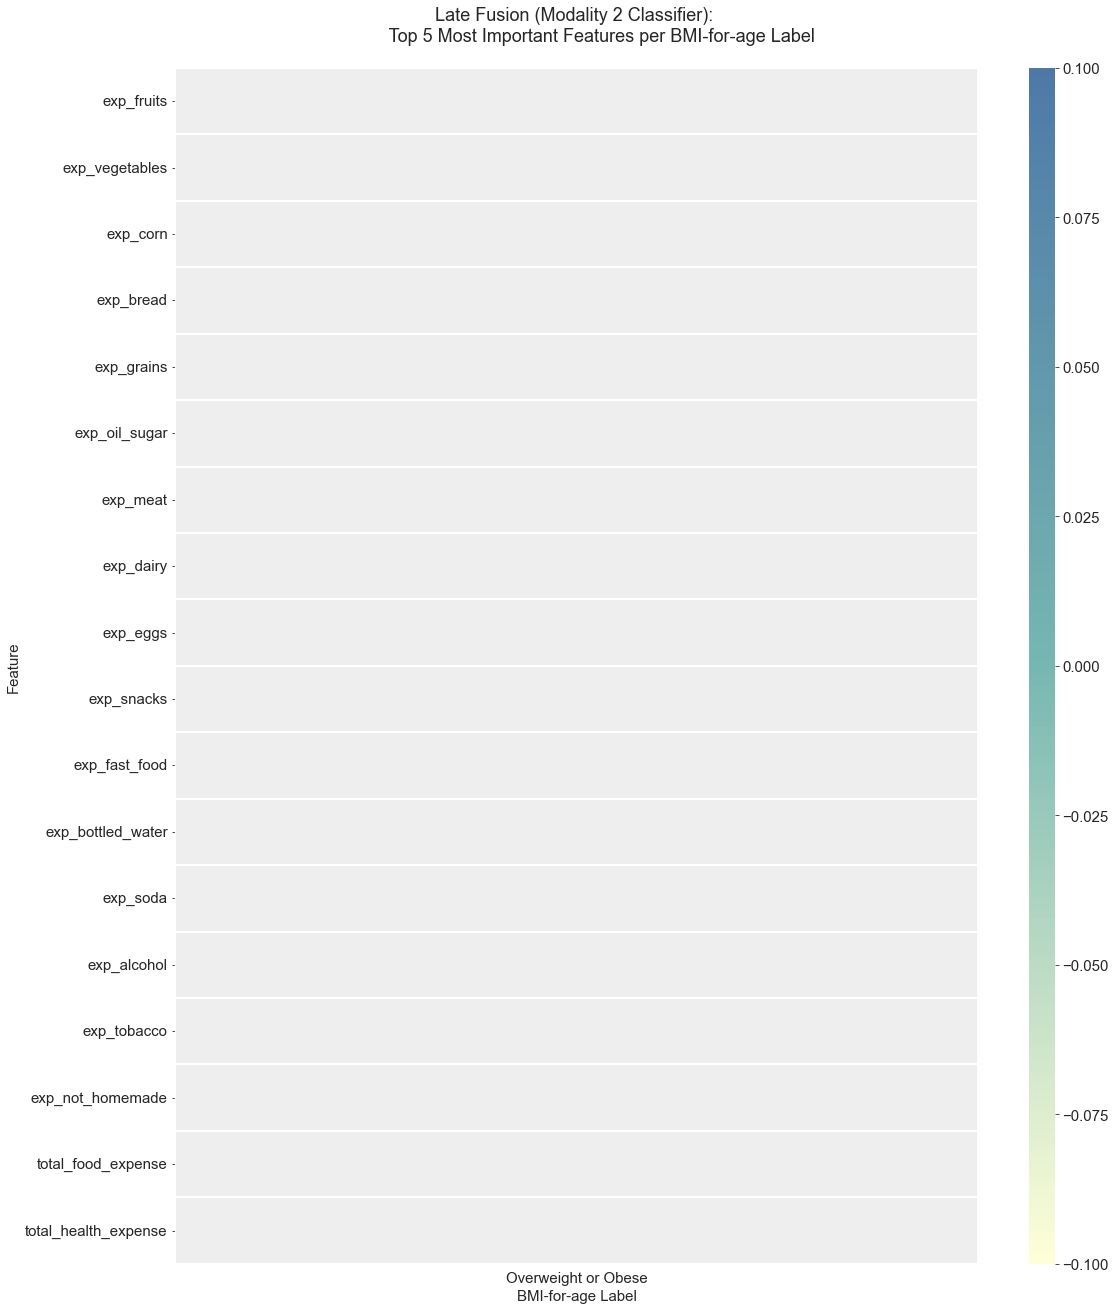

In [7]:
data = coef_df.copy()
data_abs = data.abs()
top_features_per_BMI_for_age_label = {}
n = 5
for c in data.columns:
    top_features_per_BMI_for_age_label[c] = data_abs.nlargest(n, columns=c).index.tolist()

#all_features = set(data.index.tolist())
features_to_keep = set([item for sublist in top_features_per_BMI_for_age_label.values() for item in sublist])
#features_to_drop = all_features - features_to_keep

data_reduced = data.loc[features_to_keep].reindex(data.index).dropna()
data_reduced = data_reduced.reindex(feat_order_summary_m2)
mask = np.array([[feat not in top_features_per_BMI_for_age_label[c] for feat in data_reduced.index] for c in data_reduced.columns]).T
data_reduced.mask(mask).to_csv(os.path.join(output_path,'others','tmp','m2_classifier_feature_contributions_top_'+str(n)+'.csv'), index=True, header=True)

# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(18,22))
hm = sns.heatmap(data_reduced, annot=True, annot_kws={"size": 13}, fmt='.2f', cmap=conf_cmap, cbar_kws={"aspect": 45}, linewidth=0.25, mask=mask)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
ax = hm.axes
ax.set_facecolor((238/255, 238/255, 238/255))
plt.savefig(os.path.join(output_path,'others','report_m2_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 2 Classifier): 
          Top """ + str(n) + """ Most Important Features per BMI-for-age Label
          """)
plt.savefig(os.path.join(output_path,'others','m2_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})